In [18]:
import torch
import torch.nn as nn
import numpy as np
import re
import jieba
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 数据预处理
good_file = 'good.txt'
bad_file = 'bad.txt'

# 把sentence里的标点符号过滤掉
def filter_punc(sentence):
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", sentence)
    return sentence

# 扫描所有的文本，分词并建立词典
def Prepare_data(good_file, bad_file, is_filter = True):
    all_words = [] # 存储所有的单词
    pos_sentences = []
    neg_sentences = []
    with open(good_file, 'r') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                line = filter_punc(line)
            words = jieba.lcut(line) 
            if len(words) > 0:
                all_words += words
                pos_sentences.append(words)       
    print('{0} 包含 {1} 行, {2} 个词.'.format(good_file, idx + 1, len(all_words)))
    count = len(all_words)
    with open(bad_file, 'r') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                line = filter_punc(line)
            words = jieba.lcut(line) 
            if len(words) > 0:
                 all_words += words
                 neg_sentences.append(words)   
        print('{0} 包含 {1} 行, {2} 个词.'.format(bad_file, idx+1, len(all_words)-count))      
    #建立词典， 
    diction = {}
    cnt = Counter(all_words)
    for word, freq in cnt.items():
        diction[word] = [len(diction), freq]
    print('词典大小: {}'.format(len(diction)))
    return(pos_sentences, neg_sentences, diction)

# 根据单词返还单词的编码
def word2index(word, diction):
    if word in diction:
        value = diction[word][0]
    else:
        value = -1
    return(value)

# 根据编码获得单词
def index2word(index, diction):
    for w, v in diction.items():
        if v[0] == index:
            return(w)
    return(None)

pos_sentences, neg_sentences, diction = Prepare_data(good_file, bad_file, False)
pos_sentences

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\xiaogang\AppData\Local\Temp\ipykernel_17992\28803507.py:7: SyntaxWarning: invalid escape sequence '\s'
  sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", sentence)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xiaogang\AppData\Local\Temp\jieba.cache
Loading model cost 1.501 seconds.
Prefix dict has been built successfully.


good.txt 包含 8089 行, 136359 个词.
bad.txt 包含 5076 行, 75600 个词.
词典大小: 7029


[['这',
  '应该',
  '是',
  '我',
  '在',
  '网上',
  '买',
  '裤子',
  '最',
  '喜欢',
  '的',
  '一条',
  '的',
  '，',
  '太赞',
  '\n'],
 ['不错', '，', '穿着', '舒服', '，', '还', '不贵', '，', '挺', '好', '\n'],
 ['穿着', '很', '舒服', '，', '洗过', '也', '不缩水', '，', '显瘦', '，', '点赞', '！', '\n'],
 ['今天',
  '的',
  '第一次',
  '穿',
  '，',
  '刚',
  '坐下',
  '就',
  '发现',
  '裤边',
  '都',
  '开线',
  '了',
  '，',
  '从',
  '没有',
  '买过',
  '这',
  '这么',
  '结实',
  '的',
  '衣服',
  '！',
  '太',
  '耐穿',
  '了',
  '，',
  '早上',
  '穿',
  '的',
  '，',
  '到',
  '公司',
  '就要',
  '走光',
  '了',
  '！',
  '这',
  '可是',
  '零下',
  '五度',
  '的',
  '天气',
  '啊',
  '！',
  '我滴天',
  '！',
  '\n'],
 ['老公', '很', '喜欢', '，', '大小', '合适', '，', '裤子', '不错', '\n'],
 ['经过',
  '我',
  '的',
  '亲身',
  '体验',
  '，',
  '这家',
  '店',
  '信誉',
  '是',
  '相当',
  '地',
  '不错',
  '。',
  '宝贝',
  '的',
  '质量',
  '更',
  '像',
  '钻石',
  '一般',
  '。',
  '太',
  '感谢',
  '了',
  '！',
  '\n'],
 ['掌柜的',
  '服务态度',
  '真',
  '好',
  '，',
  '发货',
  '很快',
  '。',
  '商品质量',
  '也',
  '相当',
  '不错',
  '。',
  '太',
  '喜欢',

In [4]:
# 文本数据向量化：词袋模型

# 输入词典编码后的句子sentence和词典dictionary，输出词袋模型编码
def sentence2vec(sentence, dictionary):
    vector = np.zeros(len(dictionary))
    for l in sentence:
        vector[l] += 1
    return(1.0 * vector / len(sentence)) # 每个词的频率

dataset = []
labels = []
sentences = []

for sentence in pos_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(0)
    sentences.append(sentence)


for sentence in neg_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(1)
    sentences.append(sentence)
# 打乱所有数据顺序，形成数据集
# indices为所有数据下标的一个随机全排列
indices = np.random.permutation(len(dataset))
dataset = [dataset[i] for i in indices]
labels = [labels[i] for i in indices]
sentences = [sentences[i] for i in indices]


In [5]:
# 数据划分,分为：[校准集,测试集,训练集]，其中校准和测试集合的长度都是整个数据集的10分之一
test_size = len(dataset) // 10
train_data = dataset[2 * test_size :]
train_label = labels[2 * test_size :]

valid_data = dataset[: test_size]
valid_label = labels[: test_size]

test_data = dataset[test_size : 2 * test_size]
test_label = labels[test_size : 2 * test_size]

In [ ]:
# 建立模型
model = torch.nn.Sequential(
    nn.Linear(len(diction), 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.LogSoftmax(dim=1)
)
def rightness(predicitons, labels):
    """计算预测错误率的函数"""
    pred = torch.max(predicitons.data, 1)[1] # 每一行的最大元素的下标,pred是一个行向量
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels)


### 训练模型

In [16]:
# 损失函数为交叉熵
cost = torch.nn.NLLLoss()
# 优化算法为Adam,可以自动调节学习率
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
records = []

losses = []
for epoch in range(10):
    for i, data in enumerate(zip(train_data, train_label)):
        x, y = data

        # 批大小为1
        x = torch.tensor(x, requires_grad=True, dtype=torch.float).view(1, -1)

        y = torch.tensor(np.array([y]), dtype=torch.long).view(1)

        optimizer.zero_grad()

        predict = model(x)

        loss = cost(predict, y)

        losses.append(loss.data.numpy())

        loss.backward()

        optimizer.step()
        
        # 每隔3000批，使用校验集校验模型
        if i % 3000 == 0:
            val_losses = []
            rights = []

            # 每次校验使用所有校验集的数据
            for j, val in enumerate(zip(valid_data, valid_label)):
                x, y = val
                x = torch.tensor(x, requires_grad=True, dtype=torch.float).view(1, -1)
                y = torch.tensor(np.array([y]), dtype = torch.long)
                predict = model(x)
                right = rightness(predict, y)
                rights.append(right)
                loss = cost(predict, y)
                val_losses.append(loss.data.numpy())

            # 计算平均准确度
            right_ratio = 1.0 * np.sum([i[0] for i in rights]) / np.sum([i[1] for i in rights])
            print('第{}轮，训练损失：{:.2f}, 校验损失：{:.2f}, 校验准确率：{:.2f}'.format(epoch, np.mean(losses), np.mean(val_losses), right_ratio))
            records.append([np.mean(losses), np.mean(val_losses), right_ratio])





第0轮，训练损失：0.68, 校验损失：0.69, 校验准确率：0.61
第0轮，训练损失：0.37, 校验损失：0.30, 校验准确率：0.90
第0轮，训练损失：0.33, 校验损失：0.27, 校验准确率：0.91
第0轮，训练损失：0.32, 校验损失：0.25, 校验准确率：0.91
第1轮，训练损失：0.32, 校验损失：0.25, 校验准确率：0.91
第1轮，训练损失：0.31, 校验损失：0.27, 校验准确率：0.91
第1轮，训练损失：0.29, 校验损失：0.25, 校验准确率：0.91
第1轮，训练损失：0.29, 校验损失：0.24, 校验准确率：0.92
第2轮，训练损失：0.29, 校验损失：0.25, 校验准确率：0.92
第2轮，训练损失：0.28, 校验损失：0.27, 校验准确率：0.91
第2轮，训练损失：0.27, 校验损失：0.26, 校验准确率：0.91
第2轮，训练损失：0.27, 校验损失：0.25, 校验准确率：0.92
第3轮，训练损失：0.27, 校验损失：0.25, 校验准确率：0.92
第3轮，训练损失：0.26, 校验损失：0.27, 校验准确率：0.91
第3轮，训练损失：0.25, 校验损失：0.26, 校验准确率：0.91
第3轮，训练损失：0.25, 校验损失：0.26, 校验准确率：0.92
第4轮，训练损失：0.25, 校验损失：0.26, 校验准确率：0.91
第4轮，训练损失：0.25, 校验损失：0.28, 校验准确率：0.90
第4轮，训练损失：0.24, 校验损失：0.28, 校验准确率：0.91
第4轮，训练损失：0.24, 校验损失：0.27, 校验准确率：0.91
第5轮，训练损失：0.24, 校验损失：0.27, 校验准确率：0.91
第5轮，训练损失：0.23, 校验损失：0.29, 校验准确率：0.90
第5轮，训练损失：0.23, 校验损失：0.29, 校验准确率：0.91
第5轮，训练损失：0.23, 校验损失：0.28, 校验准确率：0.92
第6轮，训练损失：0.23, 校验损失：0.28, 校验准确率：0.91
第6轮，训练损失：0.23, 校验损失：0.30, 校验准确率：0.90
第6轮，训练损失：0.22, 校验损失：0.30, 校验准确率：0.91
第

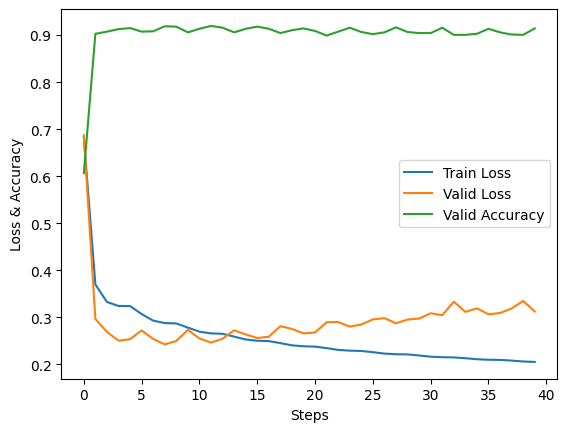

In [19]:
# 绘制误差曲线
a = [i[0] for i in records]
b = [i[1] for i in records]
c = [i[2] for i in records]
plt.plot(a, label = 'Train Loss')
plt.plot(b, label = 'Valid Loss')
plt.plot(c, label = 'Valid Accuracy')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.legend()

In [20]:
# 保存、提取模型
torch.save(model, 'bow.mdl')
# model = torch.load('bow.mdl')
